# Linear Regression with Python

Purpose: The purpose of this linear regression model is to predict the Global Sea Levels in the near future. 


## Check out the data
Source: https://podaac.jpl.nasa.gov/dataset/MERGED_TP_J1_OSTM_OST_GMSL_ASCII_V51
### Import Libraries

In [3]:
import pandas as pd
import numpy as np

### Check out the Data

In [5]:
df = pd.read_csv('sea_level_NASA.csv')

In [6]:
df.head()

,Year,Month,SL (mm)
0,1993,1,-29.17
1,1993,2,-27.86
2,1993,3,-24.05
3,1993,4,-24.26
4,1993,5,-23.76


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     379 non-null    int64  
 1   Month    379 non-null    int64  
 2   SL (mm)  379 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.0 KB


In [9]:
df.describe()

,Year,Month,SL (mm)
count,379.000000,379.000000,379.000000
mean,2008.295515,6.453826,22.779499
std,9.131448,3.451839,30.440446
min,1993.000000,1.000000,-29.170000
25%,2000.000000,3.000000,-2.235000
50%,2008.000000,6.000000,17.120000
75%,2016.000000,9.000000,51.375000
max,2024.000000,12.000000,85.700000


<Axes: xlabel='Year'>

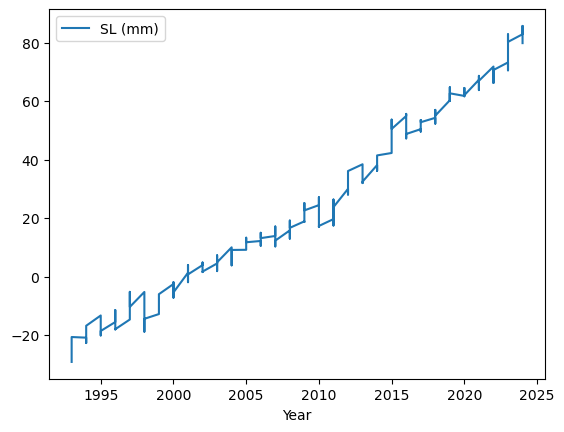

In [12]:
df.plot(x='Year',y='SL (mm)')

## Training a Linear Regression Model
### X and y arrays

In [14]:
X = df[['Year','Month']]
y = df['SL (mm)']

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,train_size=220,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [22]:
#intercept
print(lm.intercept_)

-6595.14985484434


In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])

In [24]:
coeff_df

,Coefficient
Year,3.295106
Month,0.044739


- If all the other factors are fixed, increase in Year by 1 unit will increase the Sea Level by 3.295106mm

- If all the other factors are fixed, increase in Month by 1 unit will increase the Sea Level by 0.044739mm


## Predictions from our Model

In [27]:
predictions = lm.predict(X_test)

In [42]:
X_test["Prediction Results"]= predictions
X_test["Actual Results"]=y_test

In [44]:
X_test

,Year,Month,Prediction Results,Actual Results
299,2017,12,51.616033,52.78
308,2018,9,54.776922,56.87
179,2007,12,18.664972,12.30
172,2007,5,18.351800,13.97
81,1999,10,-7.785355,-7.04
...,...,...,...,...
119,2002,12,2.189441,1.71
160,2006,5,15.056694,13.38
205,2010,2,28.102902,24.97
186,2008,7,21.736384,17.98


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [36]:
from sklearn import metrics

In [38]:
print("MAE", metrics.mean_absolute_error(y_test,predictions))
print("MSE", metrics.mean_squared_error(y_test,predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 3.4556431058694317
MSE 19.235468907992082
RMSE 4.385825909448765
